In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hc_5 = pd.read_csv('results/hc_5e_f1_post_test.csv')
rdist_5 = pd.read_csv('results/rnadist_5e_f1_post_test.csv')

sincfold_f1 = {
    "16s": 0.391664,
    "23s": 0.402430,
    "5s": 0.438967,
    "RNaseP": 0.442618,
    "grp1": 0.349969,
    "srp": 0.249175,
    "tRNA": 0.685143,
    "telomerase": 0.154173,
    "tmRNA": 0.350146,
}
# Crear DataFrame para sincfold
df_sincfold = pd.DataFrame({
    'fam': list(sincfold_f1.keys()),
    'f1_post': list(sincfold_f1.values()),
    'modelo': 'sincfold'
})

df_5 = pd.merge(hc_5, rdist_5, left_on=['fam', 'fam-sim'], right_on=['fam', 'fam-sim'])
df_5

,fam,fam-sim,hc-100,hc-200,hc-400,rnadist-100,rnadist-200,rnadist-400
0,16s,0.369,0.377,0.344,0.386,0.370,0.370,0.386
1,23s,0.298,0.403,0.430,0.435,0.410,0.434,0.429
2,5s,0.412,0.498,0.525,0.515,0.494,0.525,0.521
3,RNaseP,0.432,0.461,0.450,0.343,0.463,0.451,0.461
4,grp1,0.369,0.381,0.399,0.392,0.378,0.389,0.394
5,srp,0.225,0.261,0.278,0.193,0.269,0.277,0.201
6,tRNA,0.644,0.595,0.660,0.647,0.593,0.654,0.690
7,telomerase,0.196,0.227,0.187,0.187,0.226,0.187,0.173
8,tmRNA,0.331,0.343,0.361,0.347,0.338,0.355,0.347


In [3]:
hc_5

,fam,fam-sim,hc-100,hc-200,hc-400
0,16s,0.369,0.377,0.344,0.386
1,23s,0.298,0.403,0.430,0.435
2,5s,0.412,0.498,0.525,0.515
3,RNaseP,0.432,0.461,0.450,0.343
4,grp1,0.369,0.381,0.399,0.392
5,srp,0.225,0.261,0.278,0.193
6,tRNA,0.644,0.595,0.660,0.647
7,telomerase,0.196,0.227,0.187,0.187
8,tmRNA,0.331,0.343,0.361,0.347


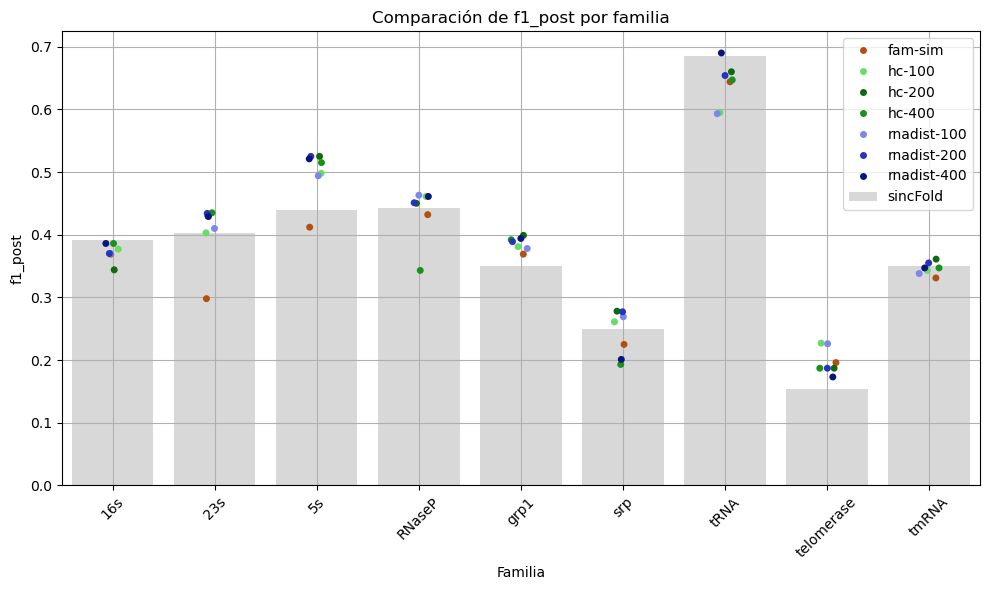

In [4]:
# Transformar a formato long
dfl_5 = df_5.melt(id_vars='fam', 
                  value_vars=[
                      'fam-sim',
                      'hc-100',
                      'hc-200',
                      'hc-400',
                      'rnadist-100',
                      'rnadist-200',
                      'rnadist-400'
                      ],
                  var_name='modelo', 
                  value_name='f1_post')

palette = {       
    'rnadist-100' : "#7C87E9", 
    'rnadist-200' : "#2534BB", 
    'rnadist-400' : "#09157E",
    'hc-100': "#67DD67", 
    'hc-200': "#0F690F", 
    'hc-400': "#1a921a", 
    'fam-sim': "#b3500e",   
    'SincFold': 'gray'   
}
# Visualización categórica
plt.figure(figsize=(10,6))
sns.stripplot(data=dfl_5, x='fam', y='f1_post', hue='modelo',palette=palette,)

sns.barplot(data=df_sincfold, x='fam', y='f1_post', 
            color='gray', alpha=0.3, errorbar=None, label='sincFold')

plt.grid()
plt.title('Comparación de f1_post por familia')
plt.ylabel('f1_post')
plt.xlabel('Familia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
hc_10 = pd.read_csv('results/hc_10e_f1_post_test.csv')
rdist_10 = pd.read_csv('results/rnadist_10e_f1_post_test.csv')

sincfold_f1 = {
    "16s": 0.391664,
    "23s": 0.402430,
    "5s": 0.438967,
    "RNaseP": 0.442618,
    "grp1": 0.349969,
    "srp": 0.249175,
    "tRNA": 0.685143,
    "telomerase": 0.154173,
    "tmRNA": 0.350146,
}
# Crear DataFrame para sincfold
df_sincfold = pd.DataFrame({
    'fam': list(sincfold_f1.keys()),
    'f1_post': list(sincfold_f1.values()),
    'modelo': 'sincfold'
})


df_10 = pd.merge(hc_10, rdist_10, left_on=['fam', 'fam-sim'], right_on=['fam', 'fam-sim'])
df_10

,fam,fam-sim,hc-100,hc-200,hc-400,rnadist-100,rnadist-200,rnadist-400
0,16s,0.311,0.330,0.255,0.329,0.343,0.352,0.363
1,23s,0.290,0.382,0.354,0.355,0.437,0.406,0.302
2,5s,0.348,0.403,0.461,0.381,0.371,0.445,0.424
3,RNaseP,0.332,0.405,0.368,0.392,0.432,0.404,0.390
4,grp1,0.298,0.388,0.313,0.253,0.425,0.404,0.283
5,srp,0.210,0.210,0.220,0.178,0.291,0.261,0.215
6,tRNA,0.645,0.659,0.643,0.599,0.596,0.675,0.623
7,telomerase,0.119,0.167,0.165,0.156,0.181,0.162,0.170
8,tmRNA,0.271,0.312,0.322,0.276,0.368,0.327,0.322


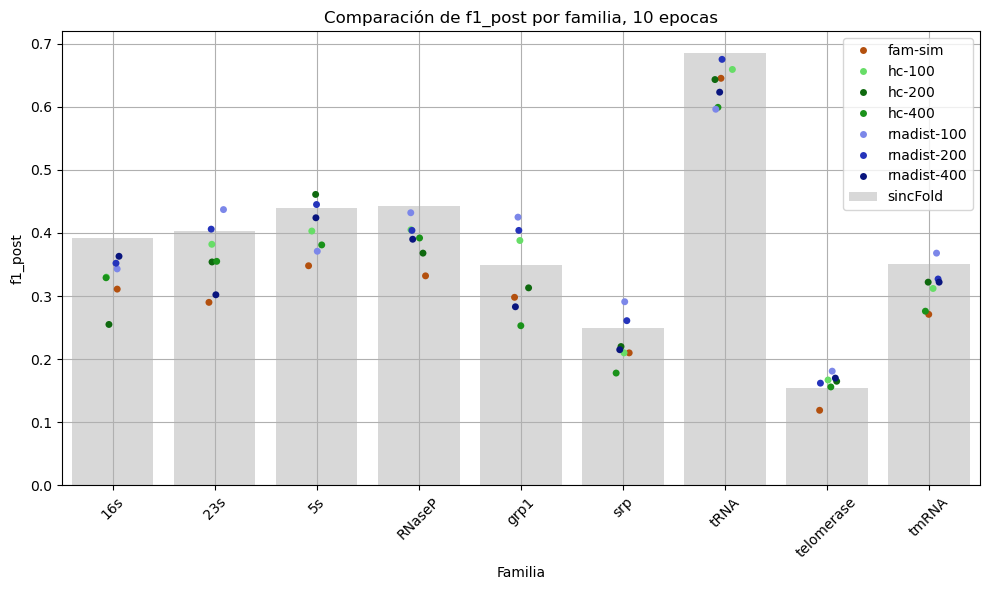

In [6]:
# Transformar a formato long
dfl_10 = df_10.melt(id_vars='fam', 
                  value_vars=[
                      'fam-sim',
                      'hc-100',
                      'hc-200',
                      'hc-400',
                      'rnadist-100',
                      'rnadist-200',
                      'rnadist-400'
                      ],
                  var_name='modelo', 
                  value_name='f1_post')

palette = {       
    'rnadist-100' : "#7C87E9", 
    'rnadist-200' : "#2534BB", 
    'rnadist-400' : "#09157E",
    'hc-100': "#67DD67", 
    'hc-200': "#0F690F", 
    'hc-400': "#1a921a", 
    'fam-sim': "#b3500e",   
    'SincFold': 'gray'   
}
# Visualización categórica
plt.figure(figsize=(10,6))
sns.stripplot(data=dfl_10, x='fam', y='f1_post', hue='modelo',palette=palette,)

sns.barplot(data=df_sincfold, x='fam', y='f1_post', 
            color='gray', alpha=0.3, errorbar=None, label='sincFold')

plt.grid()
plt.title('Comparación de f1_post por familia, 10 epocas')
plt.ylabel('f1_post')
plt.xlabel('Familia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
dfl_5.sort_values(by='modelo', ascending=False)

,fam,modelo,f1_post
62,tmRNA,rnadist-400,0.347
61,telomerase,rnadist-400,0.173
60,tRNA,rnadist-400,0.690
59,srp,rnadist-400,0.201
58,grp1,rnadist-400,0.394
...,...,...,...
1,23s,fam-sim,0.298
6,tRNA,fam-sim,0.644
7,telomerase,fam-sim,0.196
8,tmRNA,fam-sim,0.331


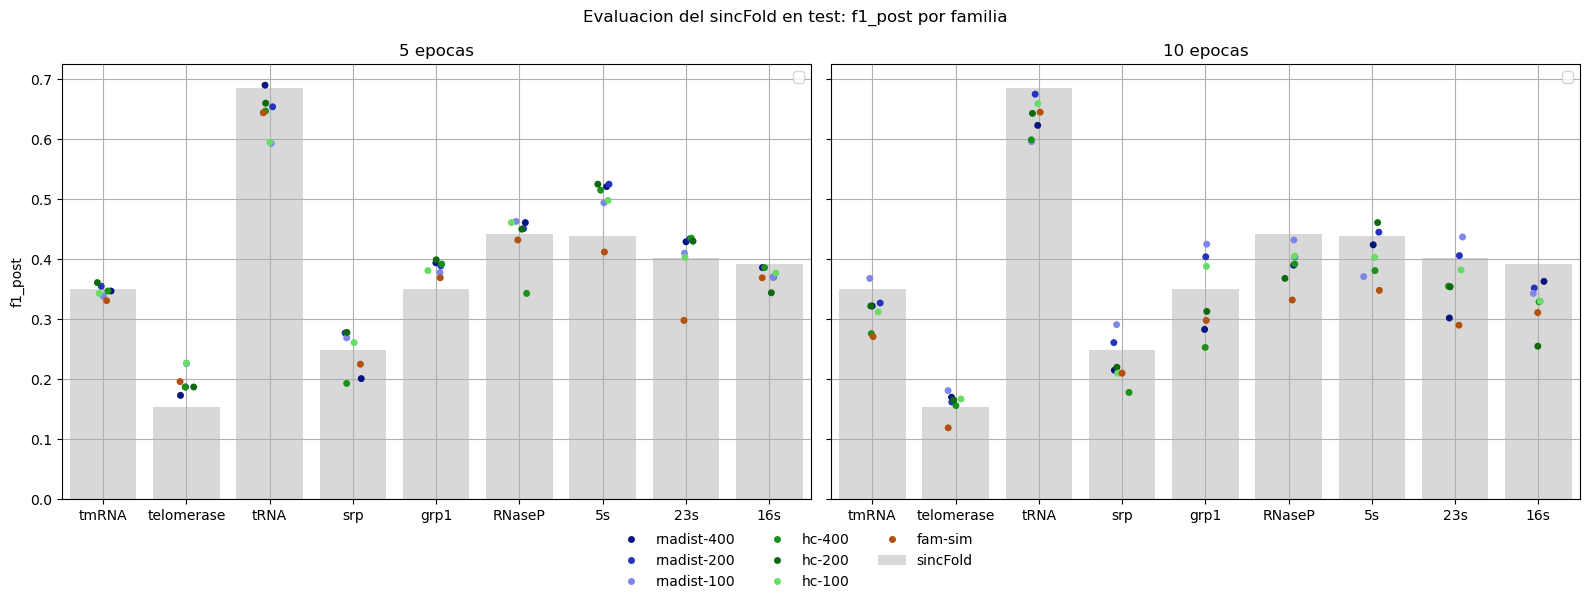

In [8]:

# Visualización categórica
fig, axes = plt.subplots(1,2, figsize=(16,6), sharey = True)
sns.stripplot(data=dfl_5.sort_values(by='modelo', ascending=False), x='fam', y='f1_post', hue='modelo',palette=palette,ax=axes[0])

sns.barplot(data=df_sincfold, x='fam', y='f1_post', 
            color='gray', alpha=0.3, errorbar=None, ax=axes[0], legend=False)

sns.stripplot(data=dfl_10.sort_values(by='modelo', ascending=False), x='fam', y='f1_post', hue='modelo',palette=palette,ax=axes[1])

sns.barplot(data=df_sincfold, x='fam', y='f1_post', 
            color='gray', alpha=0.3, errorbar=None, label='sincFold', ax=axes[1])
axes[0].grid()
axes[0].legend([])
axes[1].legend([])
axes[0].set_xlabel('')
plt.grid()
axes[0].set_title('5 epocas')
axes[1].set_title('10 epocas')
fig.suptitle('Evaluacion del sincFold en test: f1_post por familia')
plt.ylabel('f1_post') 
axes[0].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xlabel('')

# Leyenda global
handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles += h
    labels += l
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(), by_label.keys(), loc="lower center", ncol=3, frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

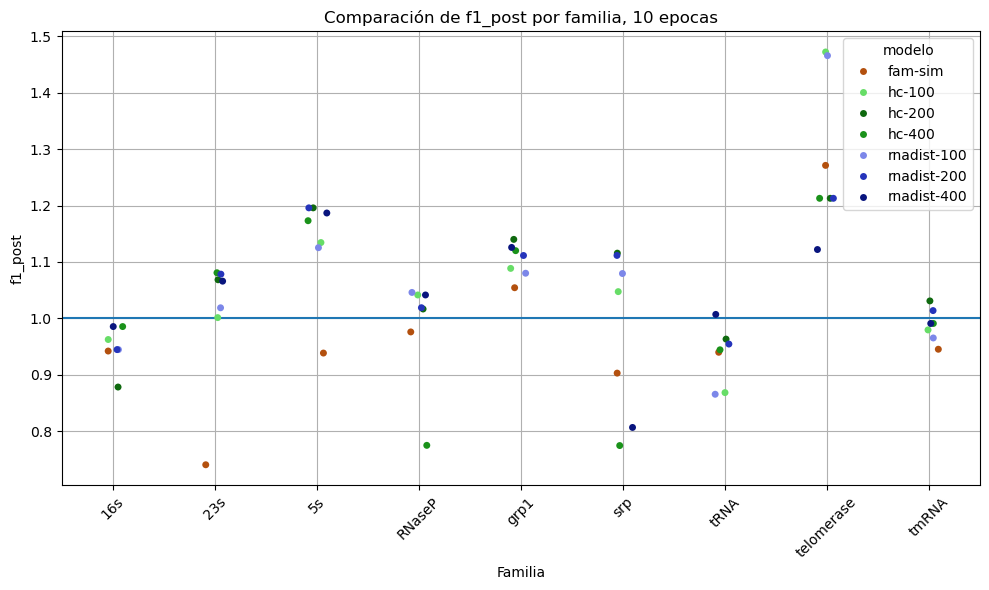

In [10]:
# Diccionario de referencia de SincFold
sincfold_f1 = {
    "16s": 0.391664,
    "23s": 0.402430,
    "5s": 0.438967,
    "RNaseP": 0.442618,
    "grp1": 0.349969,
    "srp": 0.249175,
    "tRNA": 0.685143,
    "telomerase": 0.154173,
    "tmRNA": 0.350146,
}



# Convertir a Series para facilidad de mapeo
sincfold_series = pd.Series(sincfold_f1)

# -------------------------------
# Aplicar la división por referencia
# -------------------------------
df_norm = df_5.copy()

# Columnas a normalizar (todas excepto 'fam')
cols_to_normalize = [col for col in df_5.columns if col != 'fam']

# Aplicar fila a fila
for col in cols_to_normalize:
    df_norm[col] = df_5.apply(lambda row: row[col] / sincfold_series[row['fam']], axis=1)

(df_norm)
# Transformar a formato long
dfl_10 = df_norm.melt(id_vars='fam', 
                  value_vars=[
                      'fam-sim',
                      'hc-100',
                      'hc-200',
                      'hc-400',
                      'rnadist-100',
                      'rnadist-200',
                      'rnadist-400'
                      ],
                  var_name='modelo', 
                  value_name='f1_post')

palette = {       
    'rnadist-100' : "#7C87E9", 
    'rnadist-200' : "#2534BB", 
    'rnadist-400' : "#09157E",
    'hc-100': "#67DD67", 
    'hc-200': "#0F690F", 
    'hc-400': "#1a921a", 
    'fam-sim': "#b3500e",   
    'SincFold': 'gray'   
}
# Visualización categórica
plt.figure(figsize=(10,6))
sns.stripplot(data=dfl_10, x='fam', y='f1_post', hue='modelo',palette=palette,)
plt.axhline(y=1)

plt.grid()
plt.title('Comparación de f1_post por familia, 10 epocas')
plt.ylabel('f1_post')
plt.xlabel('Familia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

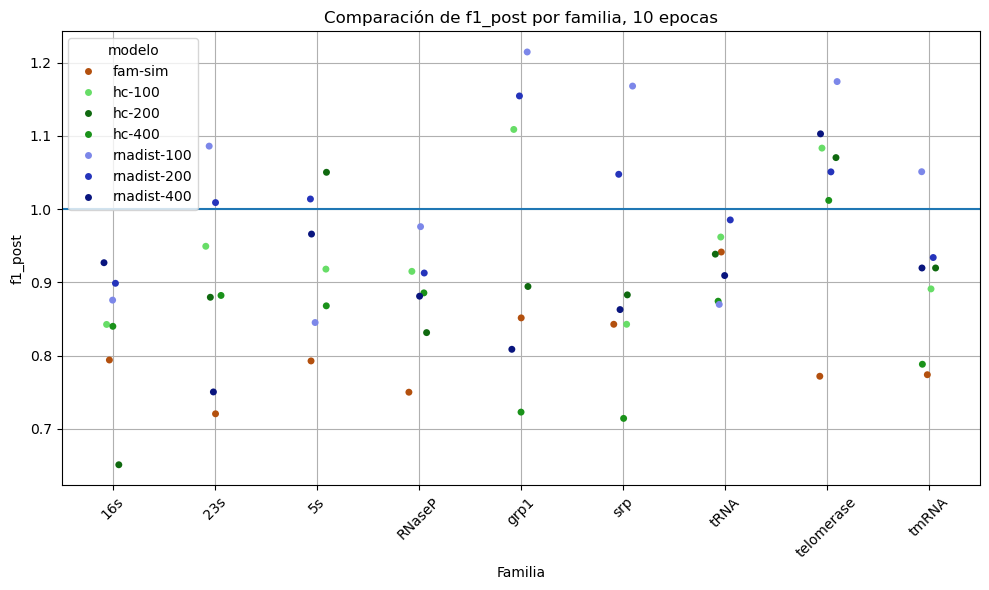

In [ ]:
# Diccionario de referencia de SincFold
sincfold_f1 = {
    "16s": 0.391664,
    "23s": 0.402430,
    "5s": 0.438967,
    "RNaseP": 0.442618,
    "grp1": 0.349969,
    "srp": 0.249175,
    "tRNA": 0.685143,
    "telomerase": 0.154173,
    "tmRNA": 0.350146,
}



# Convertir a Series para facilidad de mapeo
sincfold_series = pd.Series(sincfold_f1)

# -------------------------------
# Aplicar la división por referencia
# -------------------------------
df_norm = df_10.copy()

# Columnas a normalizar (todas excepto 'fam')
cols_to_normalize = [col for col in df_10.columns if col != 'fam']

# Aplicar fila a fila
for col in cols_to_normalize:
    df_norm[col] = df_10.apply(lambda row: row[col] / sincfold_series[row['fam']], axis=1)

(df_norm)
# Transformar a formato long
dfl_10 = df_norm.melt(id_vars='fam', 
                  value_vars=[
                      'fam-sim',
                      'hc-100',
                      'hc-200',
                      'hc-400',
                      'rnadist-100',
                      'rnadist-200',
                      'rnadist-400'
                      ],
                  var_name='modelo', 
                  value_name='f1_post')

palette = {       
    'rnadist-100' : "#7C87E9", 
    'rnadist-200' : "#2534BB", 
    'rnadist-400' : "#09157E",
    'hc-100': "#67DD67", 
    'hc-200': "#0F690F", 
    'hc-400': "#1a921a", 
    'fam-sim': "#b3500e",   
    'SincFold': 'gray'   
}
# Visualización categórica
plt.figure(figsize=(10,6))
sns.stripplot(data=dfl_10, x='fam', y='f1_post', hue='modelo',palette=palette,)
plt.axhline(y=1)

plt.grid()
plt.title('Comparación de f1_post por familia, 10 epocas')
plt.ylabel('f1_post')
plt.xlabel('Familia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

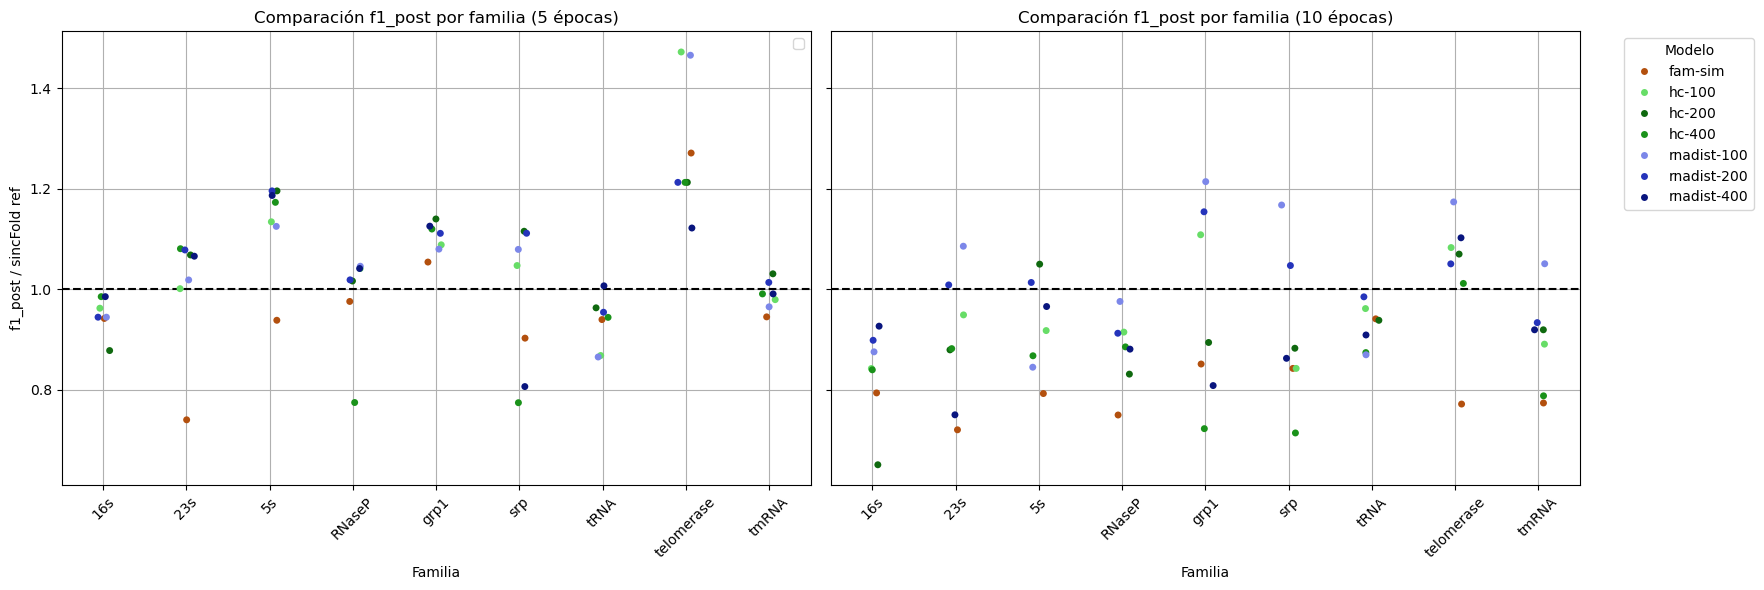

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario de referencia de SincFold
sincfold_f1 = {
    "16s": 0.391664,
    "23s": 0.402430,
    "5s": 0.438967,
    "RNaseP": 0.442618,
    "grp1": 0.349969,
    "srp": 0.249175,
    "tRNA": 0.685143,
    "telomerase": 0.154173,
    "tmRNA": 0.350146,
}

# Convertir a Series para facilidad de mapeo
sincfold_series = pd.Series(sincfold_f1)

# Paleta de colores
palette = {       
    'rnadist-100' : "#7C87E9", 
    'rnadist-200' : "#2534BB", 
    'rnadist-400' : "#09157E",
    'hc-100': "#67DD67", 
    'hc-200': "#0F690F", 
    'hc-400': "#1a921a", 
    'fam-sim': "#b3500e",   
    'SincFold': 'gray'   
}

# Función para normalizar y transformar a formato long
def normalizar_y_derretir(df, sincfold_series):
    df_norm = df.copy()
    cols_to_normalize = [col for col in df.columns if col != 'fam']
    for col in cols_to_normalize:
        df_norm[col] = df.apply(lambda row: row[col] / sincfold_series[row['fam']], axis=1)
    dfl = df_norm.melt(
        id_vars='fam', 
        value_vars=cols_to_normalize,
        var_name='modelo', 
        value_name='f1_post'
    )
    return dfl

# Normalizar y derretir ambos DataFrames
dfl_5 = normalizar_y_derretir(df_5, sincfold_series)
dfl_10 = normalizar_y_derretir(df_10, sincfold_series)

# Crear figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.stripplot(data=dfl_5, x='fam', y='f1_post', hue='modelo', palette=palette, ax=axs[0])
axs[0].axhline(y=1, color='black', linestyle='--')
axs[0].set_title('Comparación f1_post por familia (5 épocas)')
axs[0].legend([])
axs[0].set_ylabel('f1_post / sincFold ref')
axs[0].set_xlabel('Familia')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid()

sns.stripplot(data=dfl_10, x='fam', y='f1_post', hue='modelo', palette=palette, ax=axs[1])
axs[1].axhline(y=1, color='black', linestyle='--')
axs[1].set_title('Comparación f1_post por familia (10 épocas)')
axs[1].set_ylabel('')
axs[1].set_xlabel('Familia')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid()

# Ajustes finales
plt.tight_layout()
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
